In [1]:
from __future__ import print_function, division
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import rcParams
import missingno as msno
plt.style.use('seaborn-whitegrid')

In [3]:
df = pd.read_csv(r"/content/drive/My Drive/city_temperature.csv")
df.head()  # Check if data is working

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


In [4]:
df2 = pd.read_csv(r"/content/drive/My Drive/cars_sold_eu.csv")
df2.head()  # Check if data is working

,Year,Cars Sold
0,1990,"163,628"
1,1995,"182,462"
2,2000,"201,993"
3,2005,"221,608"
4,2010,"241,658"


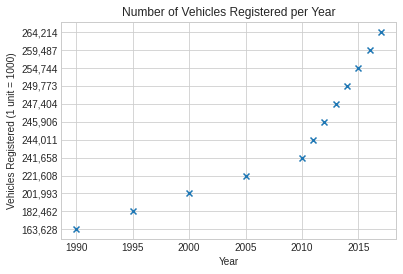

In [5]:
def draw_data(df2):
    # parse data
    x2 = df2['Year']
    y2 = df2['Cars Sold']

    df2 = plt.scatter(x2, y2, marker = 'x')
 
    plt.title("Number of Vehicles Registered per Year")
   
    plt.xlabel("Year")

    plt.ylabel("Vehicles Registered (1 unit = 1000)")

    return plt

plt = draw_data(df2)
plt.show()

In [6]:
df = df.drop(df[(df['Year']==201) | (df['Year']==200)].index)
df['Year'].value_counts()  # Drop invalid rows

2000    119682
1999    119355
2001    119355
2002    119355
2003    119140
1998    119082
1996    118951
1997    118656
2004    118645
1995    118616
2005    117895
2006    117647
2010    115627
2007    115428
2008    114908
2009    114247
2011    113740
2012    111993
2013    111021
2014    109018
2015    107498
2016    107237
2017    106946
2018    106698
2019    106337
2020     38810
Name: Year, dtype: int64

In [7]:
average_temperatures = df[df['Region'] == 'Europe'].groupby(df.Year).mean()
#removing not meaningfull rows

#calculate the average temperature
average_temperatures = average_temperatures[(average_temperatures.index != 200) & (average_temperatures.index != 201) & (average_temperatures.index != 2020)]
print(average_temperatures)


         Month        Day    Year  AvgTemperature
Year                                             
1995  6.526364  15.721444  1995.0       38.634474
1996  6.513661  15.756831  1996.0       36.537590
1997  6.526027  15.720548  1997.0       41.291805
1998  6.526027  15.720548  1998.0       40.936384
1999  6.526027  15.720548  1999.0       42.250435
2000  6.513661  15.756831  2000.0       46.421670
2001  6.526027  15.720548  2001.0       44.922228
2002  6.526027  15.720548  2002.0       43.831409
2003  6.474460  15.718692  2003.0       43.504275
2004  6.480467  15.748840  2004.0       47.620571
2005  6.526027  15.720548  2005.0       48.859400
2006  6.492871  15.713177  2006.0       48.090954
2007  6.537252  15.723513  2007.0       50.787129
2008  6.507072  15.749333  2008.0       51.060835
2009  6.526572  15.721408  2009.0       49.921038
2010  6.490118  15.714498  2010.0       47.098558
2011  6.515032  15.720790  2011.0       49.965203
2012  6.513661  15.756831  2012.0       49.115775


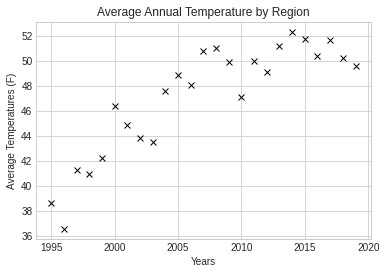

In [8]:
import matplotlib.pyplot as plt

#Scatter Plot for the average temperatures
plt.xlabel('Years')
plt.ylabel('Average Temperatures (F)')
plt.title('Average Annual Temperature by Region')

plt.errorbar(average_temperatures.index, average_temperatures.AvgTemperature, color='black', fmt='x')
plt.show()

Text(0, 0.5, 'Average Temperature, Fahrenheit')

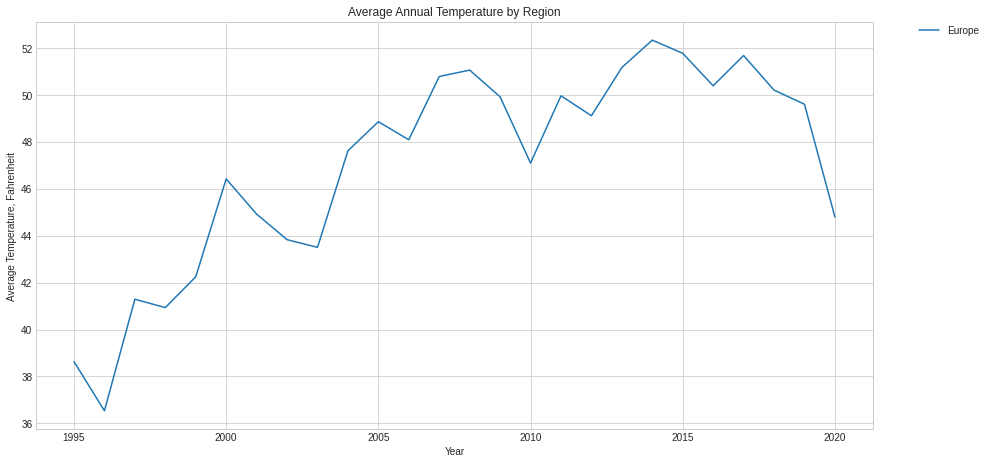

In [9]:
regions = ['Europe']

# Loop through each region and plot average temperature
plt.figure(figsize=(15,7.5))
for region in regions:
    temp = df[df['Region']== region]
    temp = temp.groupby("Year")["AvgTemperature"].mean()
    a = temp
    plt.plot(a)
    
plt.legend(regions, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('Average Annual Temperature by Region')
plt.xlabel('Year')
plt.ylabel('Average Temperature, Fahrenheit')



In [10]:
avg_temperature={}
keys=df['Region'].unique()
avg_temperature[region]=df[(df['Region']==region)&(df['Year']==2020)]['AvgTemperature'].mean()-df[(df['Region']==region)&(df['Year']==1995)]['AvgTemperature'].mean()
avg_temperature_rise=pd.DataFrame(list(avg_temperature.items()),columns=['Region','Average Temperature rise'])
print(avg_temperature_rise)  # Calculate average increase in temperature per year

   Region  Average Temperature rise
0  Europe                  6.165829


In [11]:
from sklearn import linear_model
# Prediction model using Linear Regression
x = list(map(lambda val: [val], average_temperatures.index))
y = list(average_temperatures.AvgTemperature)

reg = linear_model.Ridge(alpha=1)
reg.fit(x, y)
prediction = reg.predict(x)


In [12]:
from sklearn.isotonic import IsotonicRegression
#Isotonic Regresion
col = np.array(x)
X = col.flatten()

ir = IsotonicRegression();

y_ = ir.fit_transform(X, y)

acc = ir.score(X, y)

print(acc)


0.9498130882584005


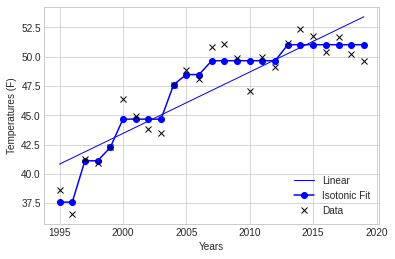

53.41074169122305
Accuracy =  92.87512854020449 %


In [13]:
plt.xlabel('Years')
plt.ylabel('Temperatures (F)')

plt.errorbar(average_temperatures.index, average_temperatures.AvgTemperature, fmt='x', color='black')
plt.plot(x, prediction, color='blue', linewidth='1')


#Isotonic
plt.plot(x, y_, 'b.-', markersize=12)

plt.legend(('Linear', 'Isotonic Fit', 'Data'), loc='lower right')

plt.show()

correct = 49.605295
print(prediction[24])
accuracy = (correct/prediction[24])*100

print('Accuracy = ', accuracy, '%')




In [14]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr

yearsOfTemp = np.array(y)
yearsOfTemp = yearsOfTemp.flatten()


# print(yearsOfTemp, y)

resDelOne = np.delete(yearsOfTemp, np.arange(1, 5))

# print(resDelOne)

resDelTwo = np.delete(resDelOne, np.arange(2, 6))

# print(resDelTwo)

resDelThree = np.delete(resDelTwo, np.arange(3, 7))

# print(resDelThree)

lenS = resDelThree.size

# print(lenS)

# # print(len)

# print(resDelThree)

resDelFour = np.delete(resDelThree, np.arange(11, 13))

# print(resDelFour)

TempUpDated = resDelFour

# print(TempUpDated)



x2 = df2['Year']
y2 = df2['Cars Sold']

x2 = np.array(x2)
y2 = np.array(y2)

# print(y2)

for i in range(12):
  y2[i] = float(y2[i].replace(',',''))

y2 = y2.astype(np.float)

# print(x2)

carsRegistered = np.delete(y2, 0)
# print("The two datasets")
# print(TempUpDated) 
# print("-----")
# print(y2)
# print("-----")


corrPearson, _ = pearsonr(TempUpDated, carsRegistered)
corrSpear,_ = spearmanr(TempUpDated, carsRegistered)
print("Pearson Correlation between Temp and Number cars registered")
print(corrPearson)

print("---")
print("Spearman Correlation between Temp and Number cars registered")
print(corrSpear)

Pearson Correlation between Temp and Number cars registered
0.88990730538292
---
Spearman Correlation between Temp and Number cars registered
0.8727272727272729
